In [52]:
import numpy as np
import qnmfits.qnm as qnm

import matplotlib.pyplot as plt
import matplotlib.colors
import rcparams
plt.rcParams.update(rcparams.params)

from scipy.optimize import minimize

from cmcrameri import cm

import astropy.constants as const
G, c, M_sun = const.G.value, const.c.value, const.M_sun.value

# G/c**3 (s/kg)
conversion = G/c**3

In [3]:
def fun(chi, Q_star, l, m, n):
    """
    Calculates the absolute difference between a quality factor given by a 
    particular spin, and a target quality factor. This is used with scipy
    minimize to convert a frequency and damping time measurement to a spin.
    """
    
    omega = qnm.omega(l, m, n, 1, chi)
    f = np.real(omega)/(2*np.pi)
    tau = -1/np.imag(omega)
    Q = np.pi*f*tau
    
    return abs(Q_star - Q)

In [ ]:
# Base plot
# ---------

fig, ax = plt.subplots(figsize=(6,4), dpi=180)

chi_array = np.linspace(0, 0.99, 200)

for n in range(2):
    for l in range(2,4):
        
        if (l==3) & (n==1):
            pass
        
        else:
            for m in range(-l,l+1):
                
                # Evaluate the QNM frequencies
                frequencies = qnm.omega(l, m, n, 1, chi_array)
                        
                # Add to the figure
                ax.plot(
                    np.real(frequencies)/(2*np.pi), 
                    -np.imag(frequencies), 
                    c='C0'
                )

ax.set_xlabel('$M_ff_{\ell m n}$')
ax.set_ylabel('$M_f/ \\tau_{\ell m n}$')

ax.set_xlim(0)
ax.set_ylim(0)

# Add measurements
# ----------------

# The measured frequency and damping time
f_star = 200
tau_star = 0.007

# The quality factor
Q_star = np.pi*f_star*tau_star

# Add the line corresponding to the measurement
x = np.linspace(0, 1)
ax.plot(x, (np.pi/Q_star)*x, c='k')

# Identify points of intersection between the measurement and the Kerr 
# spectrum

intersected_modes = []
fitted_spins = []
fitted_masses = []

for n in range(2):
    for l in range(2,4):
        
        if (l==3) & (n==1):
            pass
        
        else:
            for m in range(-l,l+1):
                result = minimize(
                    fun, 
                    x0=0.5, 
                    args=(Q_star, l, m, n), 
                    bounds=[(0.,0.99)]
                )
                if result['fun']<1e-5:
                    
                    chi_fit = result['x'][0]
                    omega_fit = qnm.omega(l, m, n, 1, chi_fit)
                    
                    Mf_fit = (np.real(omega_fit)/(2*np.pi))/(f_star*conversion)
                    
                    intersected_modes.append((l,m,n))
                    fitted_spins.append(chi_fit)
                    fitted_masses.append(Mf_fit)
                    
                    ax.plot(
                        np.real(omega_fit)/(2*np.pi), 
                        -np.imag(omega_fit), 
                        'o', 
                        c='C3',
                        alpha=0.5
                    )
                    
print('Measurement compatible with modes:')
for mode, chi, Mf in zip(intersected_modes, fitted_spins, fitted_masses):
    print(f'{mode}, chi = {chi:.3f}, Mf = {Mf/M_sun:.3f} solar masses')

In [ ]:
def bh_spectroscopy(f_star, tau_star, plot=True, verbose=True):
    
    # The quality factor
    Q_star = np.pi*f_star*tau_star
    
    if plot:
        
        # Base plot
        # ---------

        fig, ax = plt.subplots(figsize=(6,4)) # , dpi=180)

        chi_array = np.linspace(0, 0.99, 200)

        for n in range(2):
            for l in range(2,4):

                if (l==3) & (n==1):
                    pass

                else:
                    for m in range(-l,l+1):

                        # Evaluate the QNM frequencies
                        frequencies = qnm.omega(l, m, n, 1, chi_array)

                        # Add to the figure
                        ax.plot(
                            np.real(frequencies)/(2*np.pi), 
                            -np.imag(frequencies), 
                            c='C0'
                        )

        ax.set_xlabel('$M_ff_{\ell m n}$')
        ax.set_ylabel('$M_f/ \\tau_{\ell m n}$')

        ax.set_xlim(0)
        ax.set_ylim(0)

        # Add measurements
        # ----------------

        # Add the line corresponding to the measurement
        x = np.linspace(0, 1)
        ax.plot(x, (np.pi/Q_star)*x, c='k')

    # Identify points of intersection between the measurement and the Kerr 
    # spectrum

    intersected_modes = []
    fitted_spins = []
    fitted_masses = []

    for n in range(2):
        for l in range(2,4):

            if (l==3) & (n==1):
                pass

            else:
                for m in range(-l,l+1):
                    result = minimize(
                        fun, 
                        x0=0.5, 
                        args=(Q_star, l, m, n), 
                        bounds=[(0.,0.99)]
                    )
                    if result['fun']<1e-5:

                        chi_fit = result['x'][0]
                        omega_fit = qnm.omega(l, m, n, 1, chi_fit)

                        Mf_fit = (np.real(omega_fit)/(2*np.pi))/(f_star*conversion)

                        intersected_modes.append((l,m,n))
                        fitted_spins.append(chi_fit)
                        fitted_masses.append(Mf_fit)
                        
                        if plot:
                            ax.plot(
                                np.real(omega_fit)/(2*np.pi), 
                                -np.imag(omega_fit), 
                                'o', 
                                c='C3',
                                alpha=0.5
                            )
    
    if verbose:
        print('Measurement compatible with modes:')
        for mode, chi, Mf in zip(intersected_modes, fitted_spins, fitted_masses):
            print(f'{mode}, chi = {chi:.3f}, Mf = {Mf/M_sun:.3f} solar masses')
        
    for mode, chi, Mf in zip(intersected_modes, fitted_spins, fitted_masses):
        if mode == (2,2,1):
            return (chi, Mf/M_sun)

In [ ]:
_ = bh_spectroscopy(f_star = 200, tau_star = 0.007)

In [ ]:
_ = bh_spectroscopy(f_star = 2.00000000e+02, tau_star = 2.33333333e-03)

In [ ]:
bh_spectroscopy(f_star = 300, tau_star = 0.001, plot=False)

In [ ]:
f_array = np.linspace(200, 300, 10)
tau_array = np.linspace(0.001, 0.005, 10)

chi_target = 0.853
Mf_target = 100.429 

results = []

for f_star in f_array:
    for tau_star in tau_array:
        chi_Mf = bh_spectroscopy(f_star, tau_star, plot=False, verbose=False)
        if chi_Mf is not None:
            chi = chi_Mf[0]
            Mf = chi_Mf[1]
            diff = (chi-chi_target)**2 + ((Mf-Mf_target)/Mf)**2
            results.append((f_star, tau_star, diff))

In [ ]:
results = np.array(results)
results[np.argmin(results[:,-1])]

Measurement compatible with modes:
(2, 2, 0), chi = 0.690, Mf = 68.779 solar masses
(3, 3, 0), chi = 0.018, Mf = 78.527 solar masses
(2, 2, 1), chi = 0.976, Mf = 105.475 solar masses
(3, 3, 1), chi = 0.938, Mf = 145.478 solar masses
Measurement compatible with modes:
(2, 2, 1), chi = 0.690, Mf = 68.779 solar masses
(3, 3, 1), chi = 0.039, Mf = 78.731 solar masses
Measurement compatible with modes:
(2, 2, 0), chi = 0.893, Mf = 54.512 solar masses
(3, 3, 0), chi = 0.690, Mf = 68.779 solar masses
(3, 3, 1), chi = 0.976, Mf = 102.044 solar masses


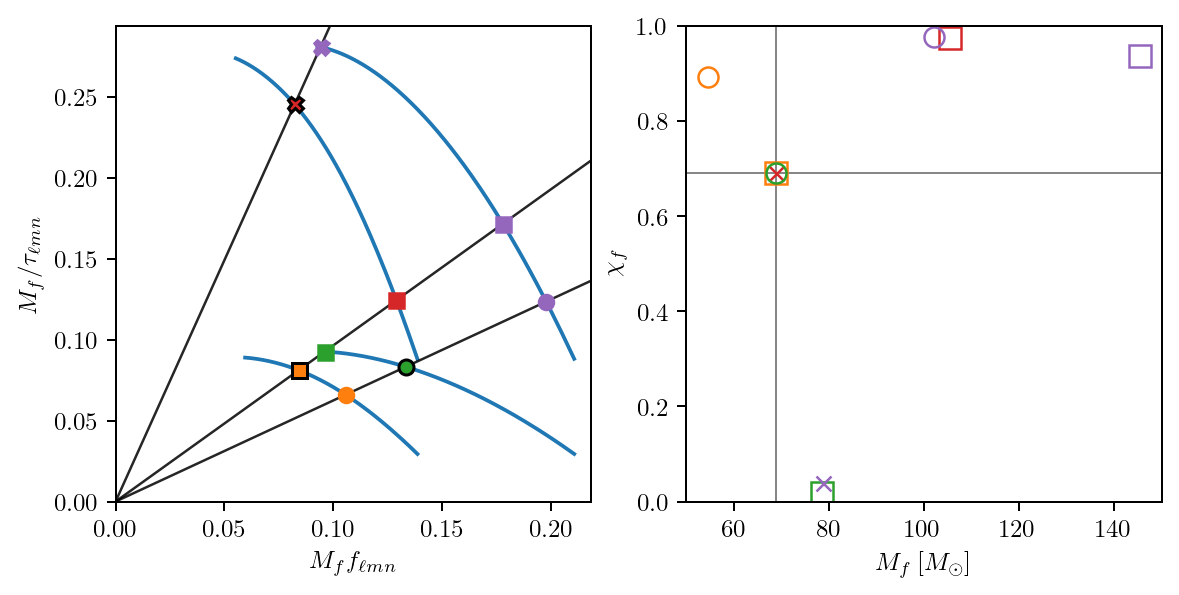

In [88]:
# Base plot
# ---------

fig, axs = plt.subplots(1, 2, figsize=(7.5,4), dpi=180)

axs[0].set_box_aspect(1)
axs[1].set_box_aspect(1)

chi_array = np.linspace(0, 0.99, 200)
cmap = cm.batlow

for n in range(2):
    for l in range(2,4):
        for m in range(-l,l+1):
            
            if l == m:

                # Evaluate the QNM frequencies
                frequencies = qnm.omega(l, m, n, 1, chi_array)

                # Add to the figure
                axs[0].plot(
                    np.real(frequencies)/(2*np.pi), 
                    -np.imag(frequencies), 
                    c='C0'
                )

axs[0].set_xlabel('$M_ff_{\ell m n}$')
axs[0].set_ylabel('$M_f/ \\tau_{\ell m n}$')

axs[1].set_xlabel('$M_f\,[M_\odot]$')
axs[1].set_ylabel('$\chi_f$')

axs[0].set_xlim(0)
axs[0].set_ylim(0)

axs[1].set_ylim(0,1)

# Add measurements
# ----------------

Mf_star, chif_star = 68.779, 0.69

modes = [(2,2,0), (2,2,1), (3,3,0)]
colours = ['C3', 'C0', 'C7']
markers_l = ['s', 'X', 'o']
markers_r = ['s', 'x', 'o']
markersizes = [9, 6, 8]

for i, (l, m, n) in enumerate(modes):
    
    omega_star = qnm.omega(l, m, n, 1, chif_star, M_sun*Mf_star*conversion)
    f_star = np.real(omega_star)/(2*np.pi)
    tau_star = -1/np.imag(omega_star)

    # The quality factor
    Q_star = np.pi*f_star*tau_star

    # Add the line corresponding to the measurement
    x = np.linspace(0, 1)
    axs[0].plot(x, (np.pi/Q_star)*x, c='k', lw=1, alpha=0.85)

    # Identify points of intersection between the measurement and the Kerr 
    # spectrum

    intersected_modes = []
    fitted_spins = []
    fitted_masses = []
    
    j = 1
    
    for n in range(2):
        for l in range(2,4):
            for m in range(-l,l+1):

                if l == m:
                    result = minimize(
                        fun, 
                        x0=0.5, 
                        args=(Q_star, l, m, n), 
                        bounds=[(0.,0.99)]
                    )
                    if result['fun']<1e-5:

                        chi_fit = result['x'][0]
                        omega_fit = qnm.omega(l, m, n, 1, chi_fit)

                        Mf_fit = (np.real(omega_fit)/(2*np.pi))/(f_star*conversion)

                        intersected_modes.append((l,m,n))
                        fitted_spins.append(chi_fit)
                        fitted_masses.append(Mf_fit)
                        
                        if abs(Mf_fit/M_sun-Mf_star) < 1: 

                            axs[0].plot(
                                np.real(omega_fit)/(2*np.pi), 
                                -np.imag(omega_fit), 
                                markers_l[i], 
                                # c=cmap(j/6),
                                c=f'C{j}',
                                markeredgecolor='k',
                                markeredgewidth=1.2,
                                # alpha=0.75
                            )
                        
                        else:
                            axs[0].plot(
                                np.real(omega_fit)/(2*np.pi), 
                                -np.imag(omega_fit), 
                                markers_l[i], 
                                # c=cmap(j/6),
                                c=f'C{j}',
                                # alpha=0.75
                            )

                        axs[1].plot(
                            Mf_fit/M_sun,
                            chi_fit,
                            markers_r[i],
                            ms=markersizes[i],
                            # c=cmap(j/6),
                            c=f'C{j}',
                            fillstyle='none',
                            # zorder=10-j
                        )
                    
                    j += 1

    print('Measurement compatible with modes:')
    for mode, chi, Mf in zip(intersected_modes, fitted_spins, fitted_masses):
        print(f'{mode}, chi = {chi:.3f}, Mf = {Mf/M_sun:.3f} solar masses')

axs[1].axhline(chif_star, c='k', alpha=0.5, zorder=-10, lw=0.75) 
axs[1].axvline(Mf_star, c='k', alpha=0.5, zorder=-10, lw=0.75) 

fig.savefig('bh_spectroscopy.pdf', bbox_inches='tight')

Measurement compatible with modes:
(2, 2, 0), chi = 0.690, Mf = 68.779 solar masses
(3, 3, 0), chi = 0.018, Mf = 78.527 solar masses
(2, 2, 1), chi = 0.976, Mf = 105.475 solar masses
(3, 3, 1), chi = 0.938, Mf = 145.478 solar masses
Measurement compatible with modes:
(2, 2, 1), chi = 0.690, Mf = 68.779 solar masses
(3, 3, 1), chi = 0.039, Mf = 78.731 solar masses
Measurement compatible with modes:
(2, 2, 0), chi = 0.893, Mf = 54.512 solar masses
(3, 3, 0), chi = 0.690, Mf = 68.779 solar masses
(3, 3, 1), chi = 0.976, Mf = 102.044 solar masses


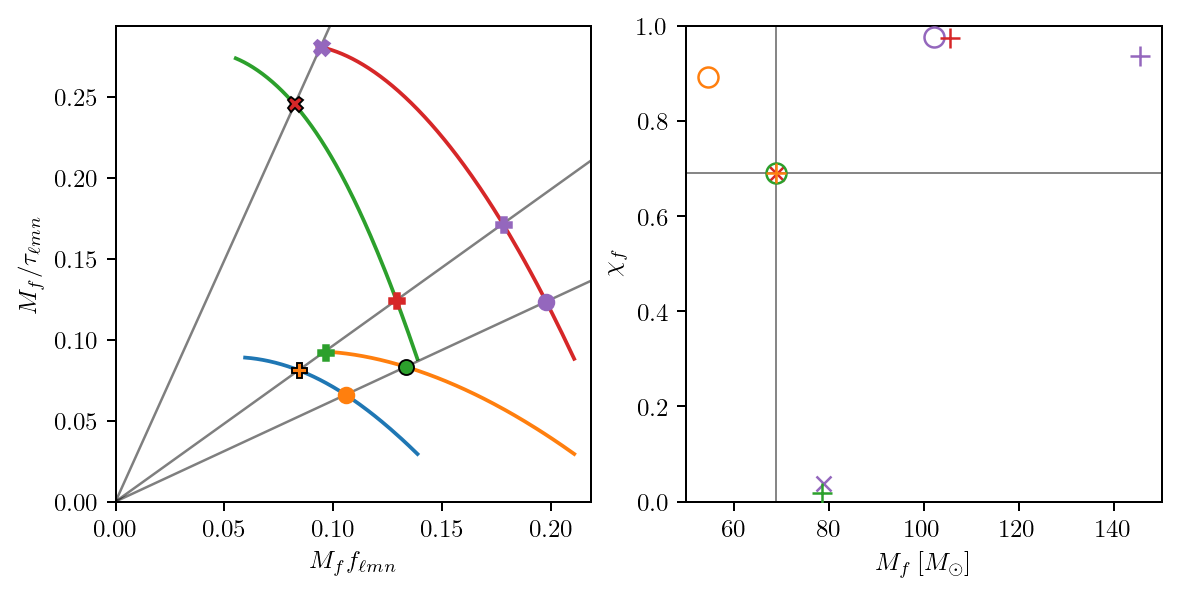

In [78]:
# Base plot
# ---------

fig, axs = plt.subplots(1, 2, figsize=(7.5,4), dpi=180)

axs[0].set_box_aspect(1)
axs[1].set_box_aspect(1)

chi_array = np.linspace(0, 0.99, 200)
cmap = cm.batlow

j = 0

for n in range(2):
    for l in range(2,4):
        for m in range(-l,l+1):
            
            if l == m:

                # Evaluate the QNM frequencies
                frequencies = qnm.omega(l, m, n, 1, chi_array)

                # Add to the figure
                axs[0].plot(
                    np.real(frequencies)/(2*np.pi), 
                    -np.imag(frequencies), 
                    c=f'C{j}'
                )
            
                j += 1

axs[0].set_xlabel('$M_ff_{\ell m n}$')
axs[0].set_ylabel('$M_f/ \\tau_{\ell m n}$')

axs[1].set_xlabel('$M_f\,[M_\odot]$')
axs[1].set_ylabel('$\chi_f$')

axs[0].set_xlim(0)
axs[0].set_ylim(0)

axs[1].set_ylim(0,1)

# Add measurements
# ----------------

Mf_star, chif_star = 68.779, 0.69

modes = [(2,2,0), (2,2,1), (3,3,0)]
colours = ['C3', 'C0', 'C7']
markers_l = ['P', 'X', 'o']
markers_r = ['+', 'x', 'o']
markersizes = [8, 6, 8]

for i, (l, m, n) in enumerate(modes):
    
    omega_star = qnm.omega(l, m, n, 1, chif_star, M_sun*Mf_star*conversion)
    f_star = np.real(omega_star)/(2*np.pi)
    tau_star = -1/np.imag(omega_star)

    # The quality factor
    Q_star = np.pi*f_star*tau_star

    # Add the line corresponding to the measurement
    x = np.linspace(0, 1)
    axs[0].plot(x, (np.pi/Q_star)*x, c='k', alpha=0.5, lw=1)

    # Identify points of intersection between the measurement and the Kerr 
    # spectrum

    intersected_modes = []
    fitted_spins = []
    fitted_masses = []
    
    j = 0
    
    for n in range(2):
        for l in range(2,4):
            for m in range(-l,l+1):

                if l == m:
                    result = minimize(
                        fun, 
                        x0=0.5, 
                        args=(Q_star, l, m, n), 
                        bounds=[(0.,0.99)]
                    )
                    if result['fun']<1e-5:

                        chi_fit = result['x'][0]
                        omega_fit = qnm.omega(l, m, n, 1, chi_fit)

                        Mf_fit = (np.real(omega_fit)/(2*np.pi))/(f_star*conversion)

                        intersected_modes.append((l,m,n))
                        fitted_spins.append(chi_fit)
                        fitted_masses.append(Mf_fit)
                        
                        if abs(Mf_fit/M_sun-Mf_star) < 1: 

                            axs[0].plot(
                                np.real(omega_fit)/(2*np.pi), 
                                -np.imag(omega_fit), 
                                markers_l[i], 
                                # c=cmap(j/6),
                                c=f'C{j}',
                                markeredgecolor='k',
                                markeredgewidth=0.75,
                                # alpha=0.75
                            )
                        
                        else:
                            axs[0].plot(
                                np.real(omega_fit)/(2*np.pi), 
                                -np.imag(omega_fit), 
                                markers_l[i], 
                                # c=cmap(j/6),
                                c=f'C{j}',
                                # alpha=0.75
                            )

                        axs[1].plot(
                            Mf_fit/M_sun,
                            chi_fit,
                            markers_r[i],
                            ms=markersizes[i],
                            # c=cmap(j/6),
                            c=f'C{j}',
                            fillstyle='none',
                            zorder=10-j
                        )
                    
                    j += 1

    print('Measurement compatible with modes:')
    for mode, chi, Mf in zip(intersected_modes, fitted_spins, fitted_masses):
        print(f'{mode}, chi = {chi:.3f}, Mf = {Mf/M_sun:.3f} solar masses')

axs[1].axhline(chif_star, c='k', alpha=0.5, zorder=-10, lw=0.75) 
axs[1].axvline(Mf_star, c='k', alpha=0.5, zorder=-10, lw=0.75) 

fig.savefig('bh_spectroscopy_alt.pdf', bbox_inches='tight')